In [ ]:
import subprocess

def install_requirements(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            # Remove whitespace and check if the line is not empty
            command = line.strip()
            if command:
                # Execute the command
                subprocess.run(command, shell=True)

# Replace 'path_to_file.txt' with the actual path to your text file
file_path = 'install_requirements.txt'
install_requirements(file_path)


Left mouse button gives  5000 iterates, right is new window
Press stop button to quit altogether


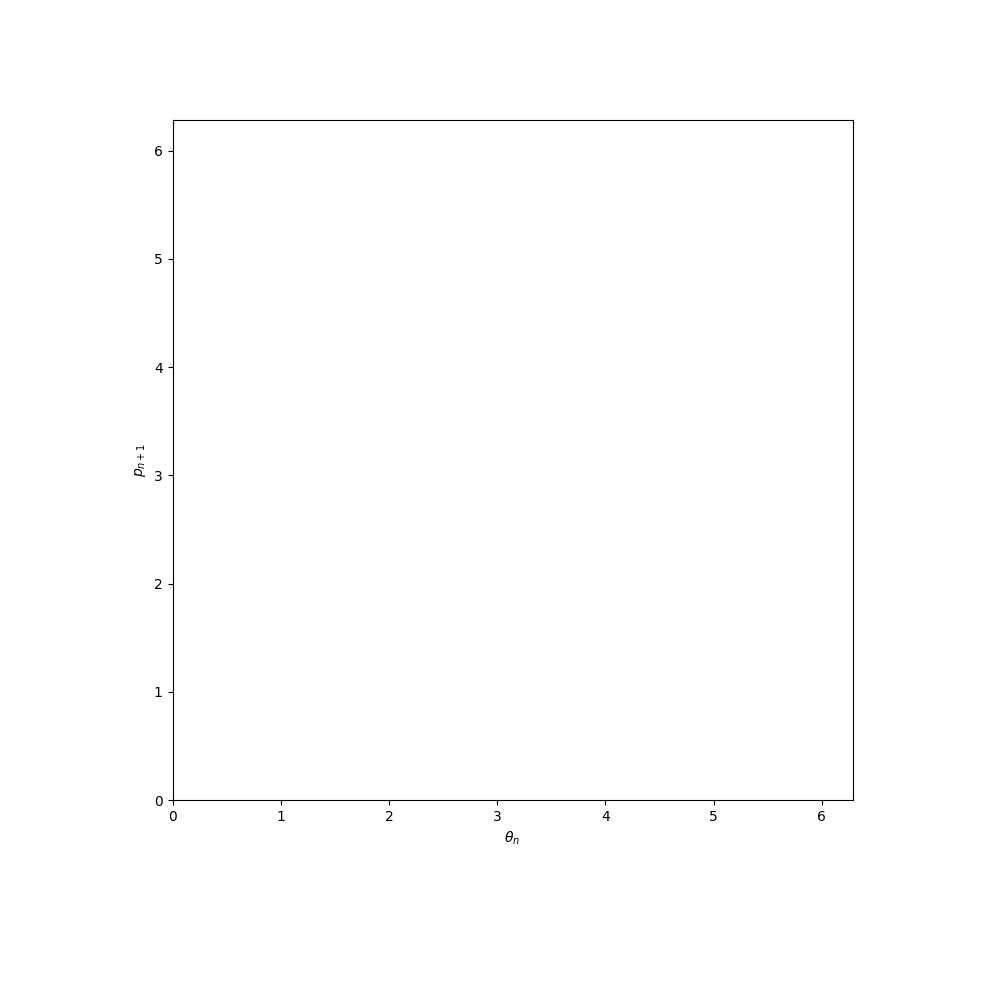

Initial point: 3.608812113090446 1.782530792605111
Initial point: 2.740254144156797 3.307127227435452
Initial point: 4.172450795058027 4.57300426726428
Initial point: 2.463054792369462 4.656164072800481
Initial point: 1.3542573852201238 3.8892458661888547
Initial point: 3.5626122211258906 2.7989284158253387
Initial point: 4.431170190059539 2.540209020823826
Initial point: 2.934293690407932 0.5258937311691938
Initial point: 4.930129023276741 2.5032491072521816
Initial point: 3.0451734311228655 2.6603287399316713
Initial point: 2.915813733622109 2.6603287399316713


In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

def standard():
    K = float(input('Give K = ') or 4)

    niter = 5000
    print('Left mouse button gives %5d iterates, right is new window' % niter)
    print('Press stop button to quit altogether')

    theta_min, theta_max = 0, 2 * np.pi
    p_min, p_max = 0, 2 * np.pi

    fig, ax = plt.subplots(figsize=(10, 10))
    plt.subplots_adjust(bottom=0.2)
    ax.set_xlim(theta_min, theta_max)
    ax.set_ylim(p_min, p_max)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel(r'$\theta_n$')
    ax.set_ylabel(r'$p_{n+1}$')

    def onclick(event):
        nonlocal theta_min, theta_max, p_min, p_max
        if event.button == 1:  # Left click
            print('Initial point:', event.xdata, event.ydata)
            iterate_plot(event.xdata, event.ydata, K, niter, ax)
        elif event.button == 3:  # Right click
            theta_min, theta_max = sorted([theta_min, event.xdata])
            p_min, p_max = sorted([p_min, event.ydata])
            ax.set_xlim(theta_min, theta_max)
            ax.set_ylim(p_min, p_max)
            fig.canvas.draw_idle()

    def iterate_plot(theta_0, p_0, K, niter, ax):
        twopi = 2 * np.pi
        theta = np.zeros(niter)
        p = np.zeros(niter)

        for n in range(niter):
            theta_1 = (theta_0 + p_0) % twopi
            p_1 = (p_0 + K * np.sin(theta_1)) % twopi
            theta[n], p[n] = theta_1, p_1
            theta_0, p_0 = theta_1, p_1

        ax.plot(theta, p, '.', color='#8B0000', markersize=1)
        fig.canvas.draw_idle()

    fig.canvas.mpl_connect('button_press_event', onclick)

standard()
